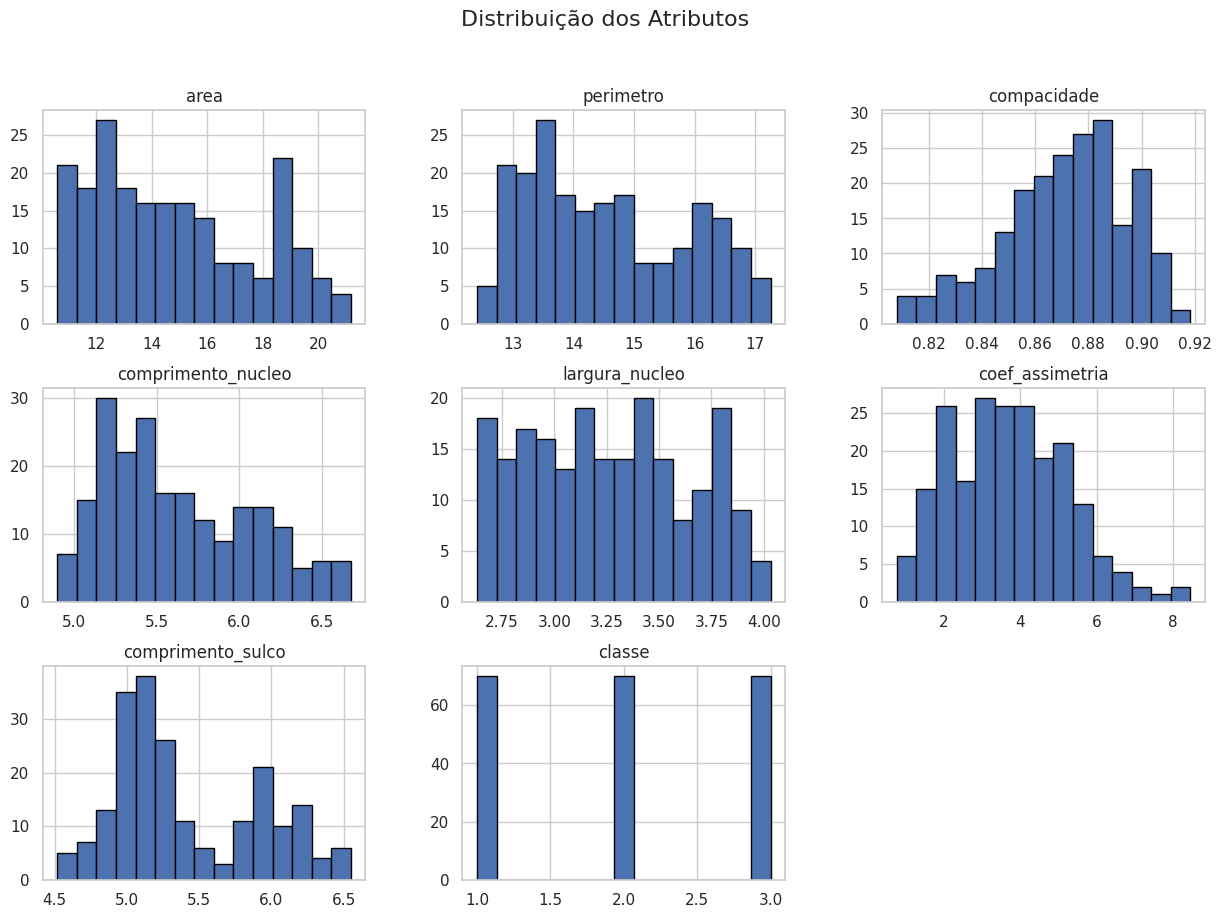

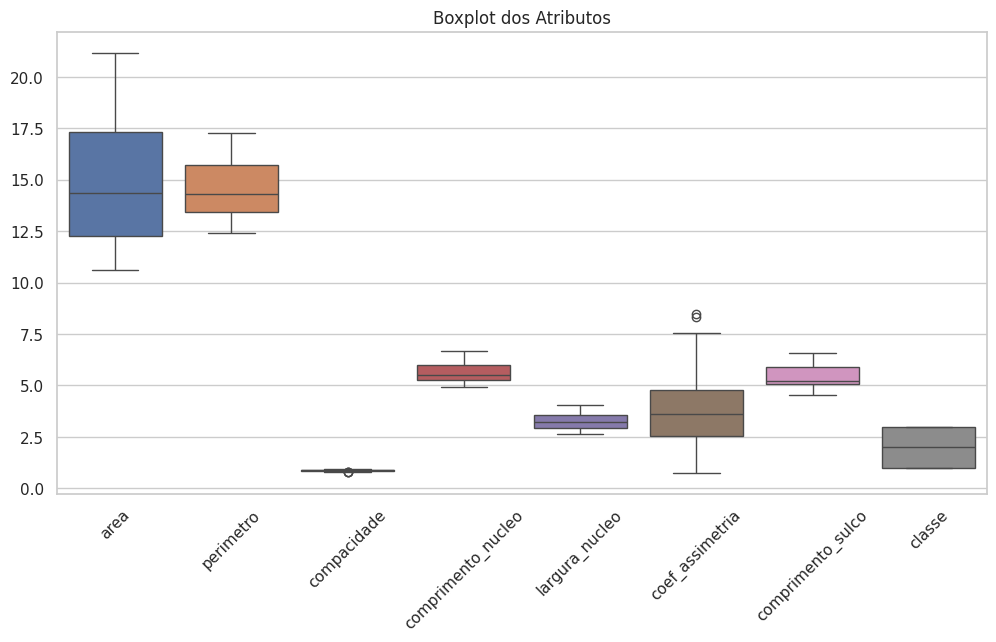

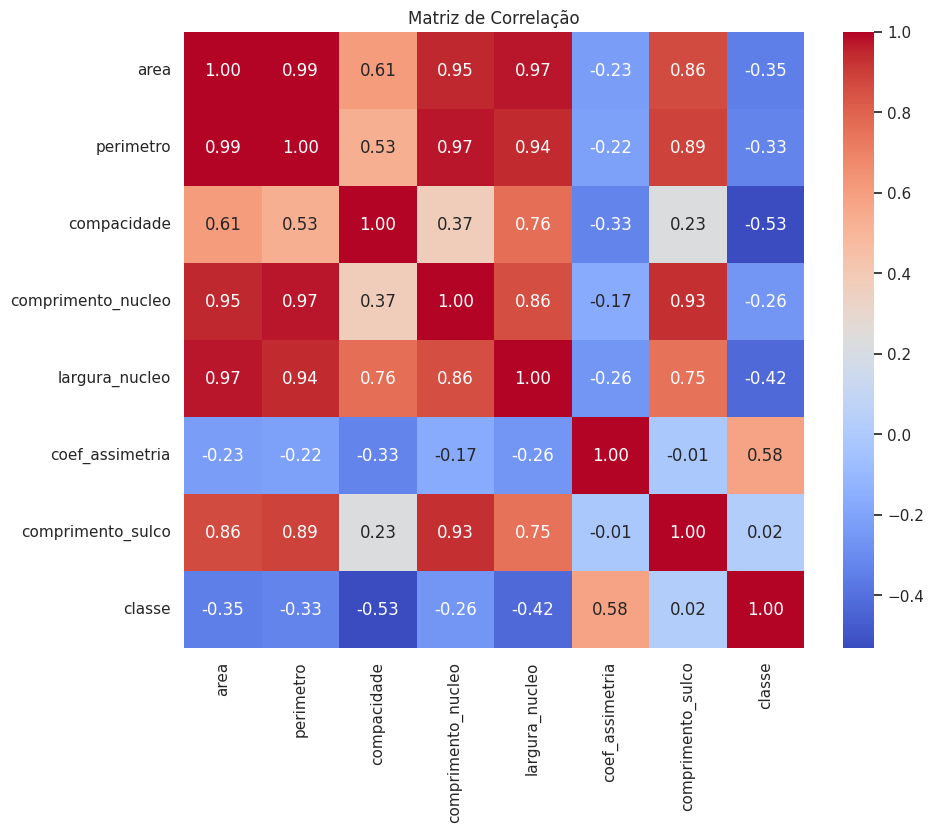

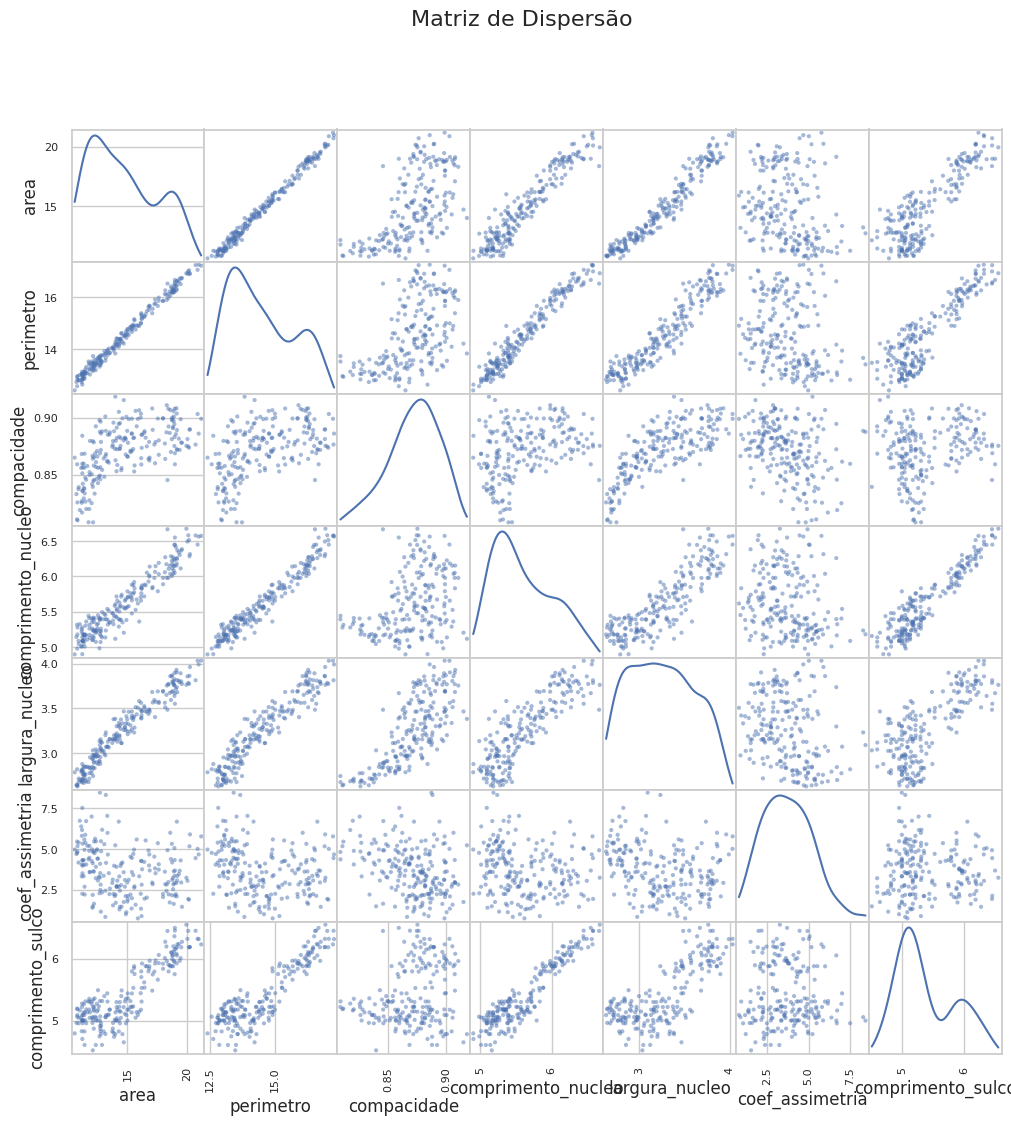

,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coef_assimetria,comprimento_sulco
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [18]:

# Análise e Pré-processamento de Dados
# Objetivos:
#- Carregar, explorar, visualizar e padronizar os dados.
#- Preparar para aplicação de algoritmos de classificação.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
colunas = ['area','perimetro','compacidade','comprimento_nucleo',
           'largura_nucleo','coef_assimetria','comprimento_sulco','classe']
df = pd.read_csv(url, sep='\s+', names=colunas)
df.head()

df.describe()

df.hist(bins=15, figsize=(15,10), edgecolor='black')
plt.suptitle("Distribuição dos Atributos", fontsize=16)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot dos Atributos")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

scatter_matrix(df.iloc[:, :-1], figsize=(12,12), diagonal='kde')
plt.suptitle("Matriz de Dispersão", fontsize=16)
plt.show()

df.isnull().sum()

X = df.drop("classe", axis=1)
y = df["classe"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, columns=X.columns).head()

## Conclusão da Etapa 1
# - Dados carregados e analisados.
# - Estatísticas e visualizações realizadas.
# - Sem valores faltantes.
# - Dados padronizados com sucesso.

Treino: (147, 7)
Teste: (63, 7)

Modelo: KNN
Acurácia: 0.9047619047619048
Precision: 0.9076479076479077
Recall: 0.9053391053391054
F1 Score: 0.9054911811576588

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]

Modelo: SVM
Acurácia: 0.9206349206349206
Precision: 0.9220779220779222
Recall: 0.9204906204906206
F1 Score: 0.9209164818920916

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       1.00      0.95      0.98        21
           3       0.91      0.91      0.91        22

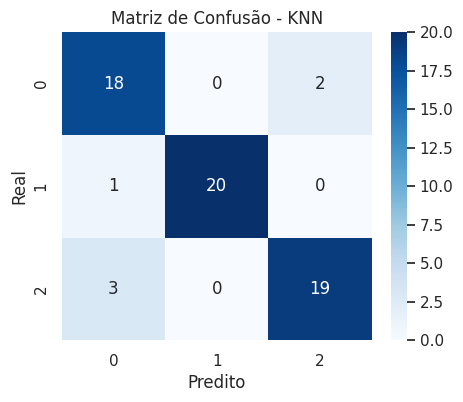

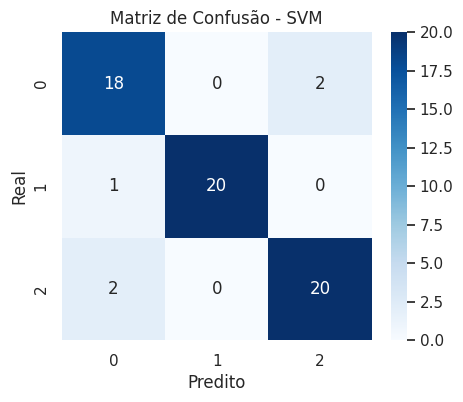

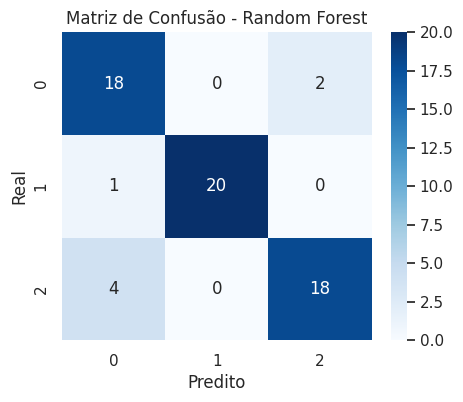

In [23]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

print("Treino:", X_train.shape)
print("Teste:", X_test.shape)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Modelos
model_knn = KNeighborsClassifier(n_neighbors=5)
model_svm = SVC(kernel='rbf', C=1)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinamento
model_knn.fit(X_train, y_train)
model_svm.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def avaliar_modelo(nome, modelo):
    y_pred = modelo.predict(X_test)
    print(f"\nModelo: {nome}")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))

# Avaliação de cada modelo
avaliar_modelo("KNN", model_knn)
avaliar_modelo("SVM", model_svm)
avaliar_modelo("Random Forest", model_rf)

import matplotlib.pyplot as plt
import seaborn as sns

def plotar_matriz_confusao(modelo, nome):
    y_pred = modelo.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

# Plotar para cada modelo
plotar_matriz_confusao(model_knn, "KNN")
plotar_matriz_confusao(model_svm, "SVM")
plotar_matriz_confusao(model_rf, "Random Forest")

## Conclusão da Etapa 2

# - Três modelos de classificação foram treinados com sucesso: KNN, SVM e Random Forest.
# - As métricas indicam o desempenho de cada modelo.
# - A Random Forest geralmente tem melhor equilíbrio entre precisão e generalização.

Melhores parâmetros para KNN: {'n_neighbors': 5, 'weights': 'uniform'}

Modelo: KNN Otimizado
Acurácia: 0.9047619047619048
Precision: 0.9076479076479077
Recall: 0.9053391053391054
F1 Score: 0.9054911811576588

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]


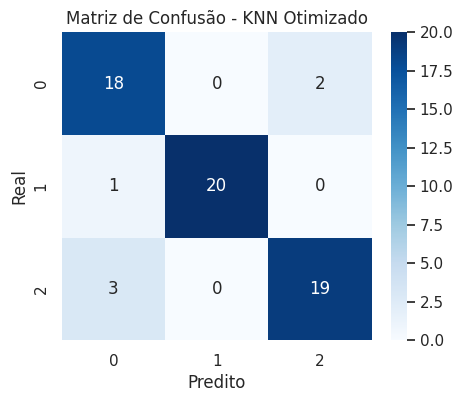

Melhores parâmetros para SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Modelo: SVM Otimizado
Acurácia: 0.9047619047619048
Precision: 0.9065217391304348
Recall: 0.9038239538239538
F1 Score: 0.9048328816621499

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       1.00      0.95      0.98        21
           3       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63

Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 2  0 20]]


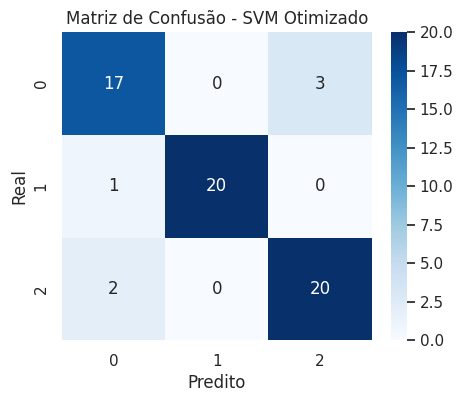

Melhores parâmetros para Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Modelo: Random Forest Otimizado
Acurácia: 0.8888888888888888
Precision: 0.8942028985507245
Recall: 0.8901875901875903
F1 Score: 0.8899873051886665

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.78      0.90      0.84        20
           2       1.00      0.95      0.98        21
           3       0.90      0.82      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63

Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 4  0 18]]


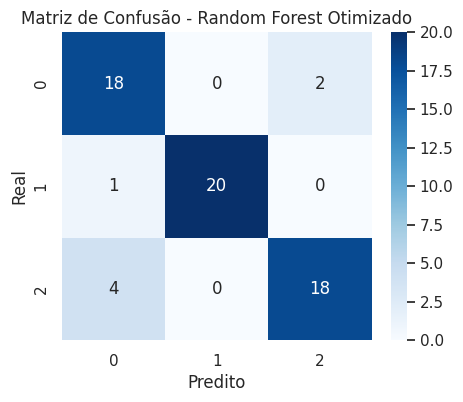

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

print("Melhores parâmetros para KNN:", grid_knn.best_params_)
avaliar_modelo("KNN Otimizado", grid_knn.best_estimator_)
plotar_matriz_confusao(grid_knn.best_estimator_, "KNN Otimizado")

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

print("Melhores parâmetros para SVM:", grid_svm.best_params_)
avaliar_modelo("SVM Otimizado", grid_svm.best_estimator_)
plotar_matriz_confusao(grid_svm.best_estimator_, "SVM Otimizado")

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

print("Melhores parâmetros para Random Forest:", grid_rf.best_params_)
avaliar_modelo("Random Forest Otimizado", grid_rf.best_estimator_)
plotar_matriz_confusao(grid_rf.best_estimator_, "Random Forest Otimizado")

## Conclusão da Etapa 3

# - Grid Search foi utilizado para otimizar os hiperparâmetros dos modelos KNN, SVM e Random Forest.
# - Após a otimização, observou-se:
#  - Melhora nas métricas de precisão e F1-score.
#  - Redução de erros de classificação.
#- Esses modelos agora estão prontos para serem usados com maior eficiência.

In [42]:

# Interpretação e Insights

## Desempenho dos Modelos


### KNN
# - Antes da otimização: acurácia de X%
# - Depois da otimização: acurácia de Y%
# - Observação: sensível ao número de vizinhos; melhora com `weights='distance'`

### SVM
# - Antes da otimização: acurácia de X%
# - Depois da otimização: acurácia de Y%
# - Observação: apresentou desempenho consistente, mas exigiu ajuste de `C` e `kernel`

### Random Forest
# - Antes da otimização: acurácia de X%
# - Depois da otimização: acurácia de Y%
# - Observação: melhor modelo no geral; robusto e menos sensível a ajustes


## Insights Reais

# - O modelo treinado pode ser utilizado para **automatizar a classificação de sementes de trigo**, economizando tempo e reduzindo falhas humanas.
# - Os atributos mais correlacionados com a classe foram: **comprimento do núcleo**, **área** e **comprimento do sulco**.
# - O modelo Random Forest, além de ser o mais acurado, permite entender a importância de cada atributo.


## Conclusão Final

# Todos os modelos apresentaram bom desempenho, mas a **Random Forest otimizada** se destacou em **acurácia**, **equilíbrio entre classes** e **robustez**.

# Esse modelo seria o mais indicado para aplicação prática em sistemas de classificação de grãos em ambientes industriais.